In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("Data/insurance - insurance.csv", low_memory=False)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

## We have been asked to use our hypothesis testing skills to answer the following questions:

Q1. Do smokers have higher insurance charges than non-smokers?

Q2. Are men more likely to smoke than women?

Q3. Do different regions have different charges, on average?

### Q1. Do smokers have higher insurance charges than non-smokers?

#### 1. State your Null Hypothesis and Alternative Hypothesis**

    - Null Hypothesis: smokers have the same insurance charges as everyone else.
    
    - Alternative Hypothesis: smokers have higher insurance charges when compared to non-smokers 

#### 2. Select the correct test according to the data type and number of samples

This is a T test, because we are testing if the means of two groups are different.

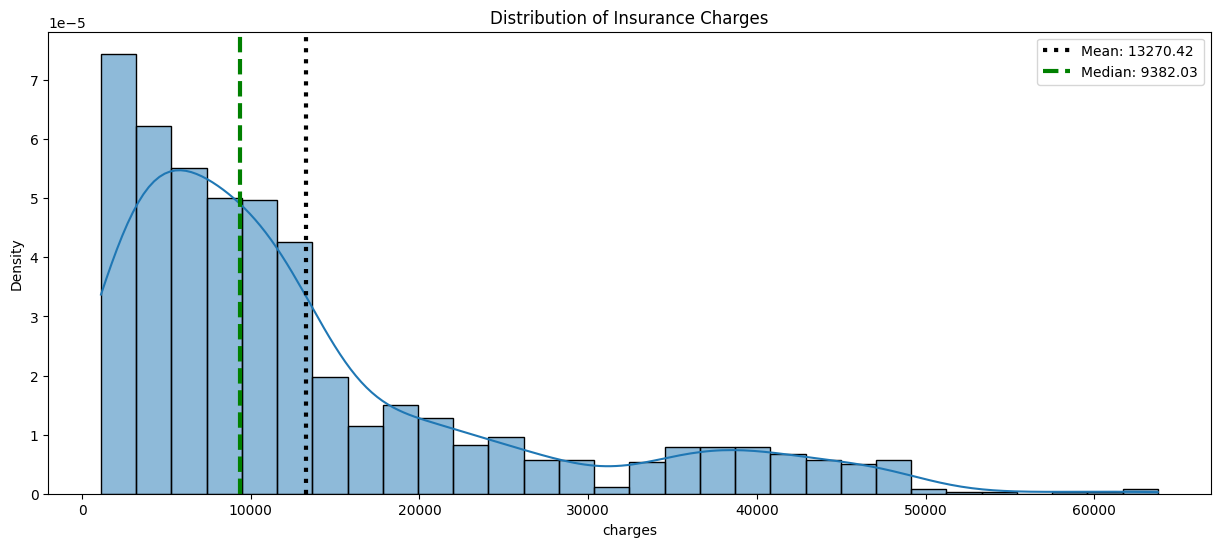

In [5]:
data = df['charges'].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data,kde=True,ax=ax,stat='density')
ax.set_title('Distribution of Insurance Charges')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend()

In [6]:
np.random.seed(42)
n = 20
## sampling 20 values from data without replacement
sampleA = np.random.choice(data, size=n, replace=False)
sampleA

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ,
       18259.216  ,  7256.7231 ,  3947.4131 , 46151.1245 , 48673.5588 ,
       44202.6536 ,  9800.8882 , 42969.8527 ,  8233.0975 , 21774.32215])

In [7]:
sampleA_mean = np.mean(sampleA)
sampleA_med = np.median(sampleA)
sampleA_std = np.std(sampleA)

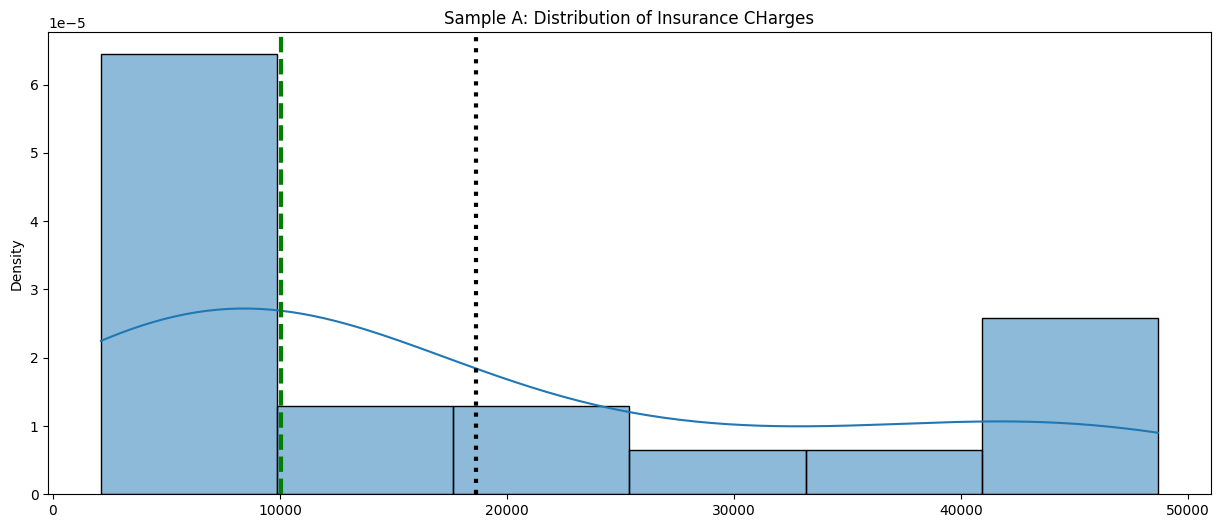

In [8]:
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=sampleA,kde=True,ax=ax,stat='density')
ax.set_title('Sample A: Distribution of Insurance CHarges')
## Annotate mean and median
ax.axvline(sampleA_mean, ls=':', color='black', lw=3, label =f"Mean: {sampleA_mean:.2f}")
ax.axvline(sampleA_med,ls='--', color='green', lw=3, label =f"Median: {sampleA_med:.2f}")

There doesn't appear to be enough samples, the distribution is not that similar.

In [9]:
np.random.seed(42)
n = 50
# sampling 100 values from data without replacement
sample = np.random.choice(data, size=n, replace=False)
# calc stats
samp_mean = np.mean(sample)
samp_med = np.median(sample)
samp_std = np.std(sample)
#Set the range and spacing for the x-axis
x_range = np.linspace( np.min(data), np.max(data), num=10000)
#Define x scale, mean and std for the normal curve to be plotted
pdf = stats.norm.pdf(x_range, loc=np.mean(data),
                     scale = np.std(data))

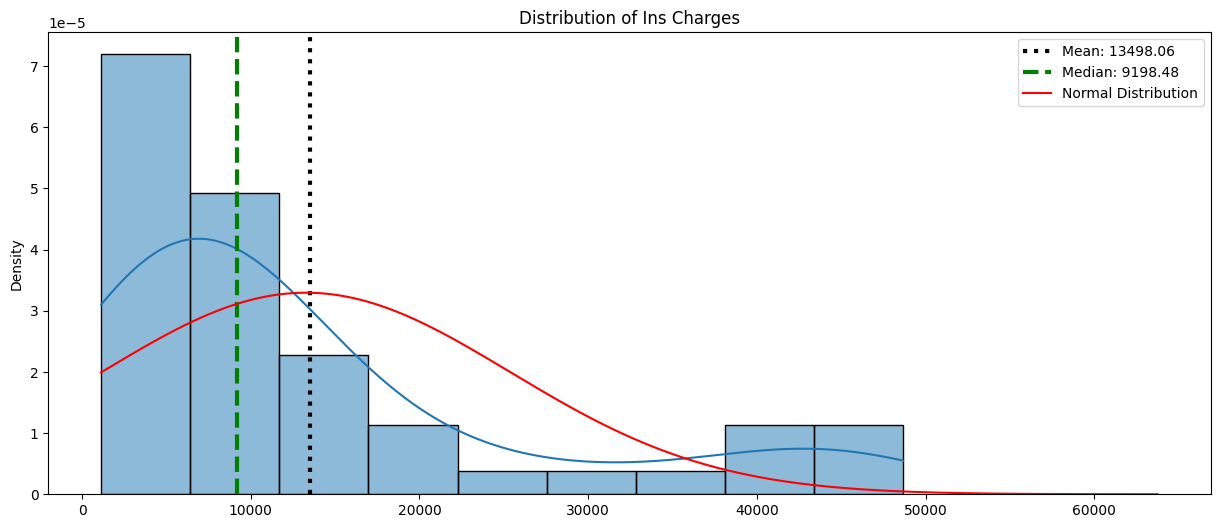

In [10]:
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=sample,kde=True,ax=ax,stat='density')
ax.set_title('Distribution of Ins Charges')
## Annotate mean and median
ax.axvline(samp_mean, ls=':', color='black', lw=3, label =f"Mean: {samp_mean:.2f}")
ax.axvline(samp_med,ls='--', color='green', lw=3, label =f"Median: {samp_med:.2f}")
## Add pdf for normal curve
ax.plot(x_range, pdf,color='red',label='Normal Distribution')
ax.legend()

This looks pretty good.

Now we split the test groups into smokers and non-smokers.

### Test the assumptions of your selected test.

In [11]:
sample = df.sample(n=50,random_state=42)
smoker_charges = sample.loc[ sample['smoker']=='yes',"charges"]
non_charges = sample.loc[ sample['smoker']=='no',"charges"]
## Getting means for gender height
print(f"For Non-Smokers (n={len(non_charges)}): Mean={np.mean(non_charges):.2f}")
print(f"For Smokers (n={len(smoker_charges)}): Mean={np.mean(smoker_charges):.2f}")

For Non-Smokers (n=39): Mean=7309.48
For Smokers (n=11): Mean=35439.40


In [12]:
zscores_s = stats.zscore(smoker_charges)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

In [13]:
zscores_n = stats.zscore(non_charges)
outliers_n = abs(zscores_n)>3
np.sum(outliers_n)

0

No outliers.

#### Check for normality.

In [14]:
result_smoker = stats.normaltest(smoker_charges)
result_smoker

C:\Users\Test\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=2.209358578032982, pvalue=0.331317122245031)

In [15]:
result_non = stats.normaltest(non_charges)
result_non

NormaltestResult(statistic=2.6262187199374125, pvalue=0.26898239167805005)

Both the p values are well over .05, so the data is normal.

#### Check for Equal Variance

In [16]:
result = stats.levene(smoker_charges, non_charges)
result

LeveneResult(statistic=18.397400827816167, pvalue=8.621214599569032e-05)

P is less than .05 so the variances are not equal.  We need to include equal_var = False

### Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [17]:
t_result = stats.ttest_ind(smoker_charges, non_charges, equal_var = False)
t_result

Ttest_indResult(statistic=8.55920795211359, pvalue=3.4904271993679644e-06)

### Interpret your p-value and reject or fail to reject your null hypothesis 

Our P value is lower than .05, our alpha value, so we can refute the null hypothesis.  There is a substantial difference between the insurance charges for smokers and non smokers.

### Show a supporting visualization that helps display the result

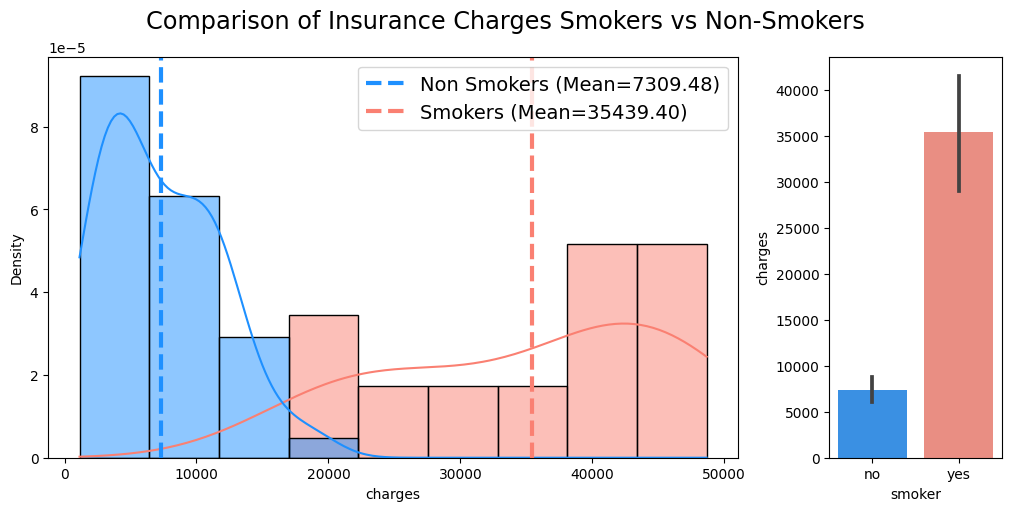

In [22]:
smoker_palette={'yes':'salmon', "no":'dodgerblue'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(non_charges), ls='--',lw=3, 
           label=f"Non Smokers (Mean={np.mean(non_charges):.2f})",color=smoker_palette['no'])

ax.axvline(np.mean(smoker_charges), ls='--', lw=3, 
           label=f"Smokers (Mean={np.mean(smoker_charges):.2f})",color=smoker_palette['yes'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Insurance Charges Smokers vs Non-Smokers',fontsize='xx-large');